In [1]:
import pandas as pd
import numpy as np

# Theory Notes

https://tobyrush.com/theorypages/index.html
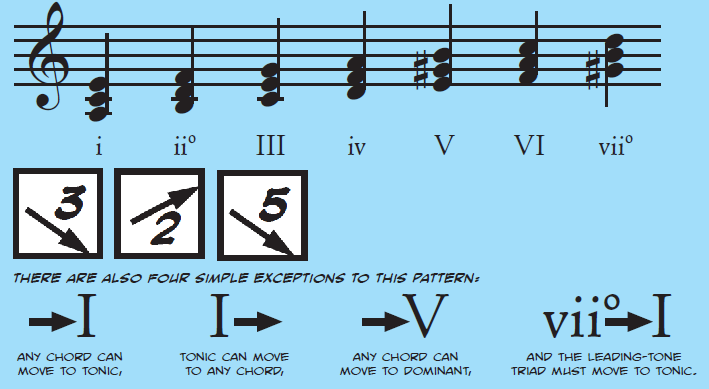

https://www.youtube.com/watch?v=YSKAt3pmYBs&ab_channel=ScottMurphy
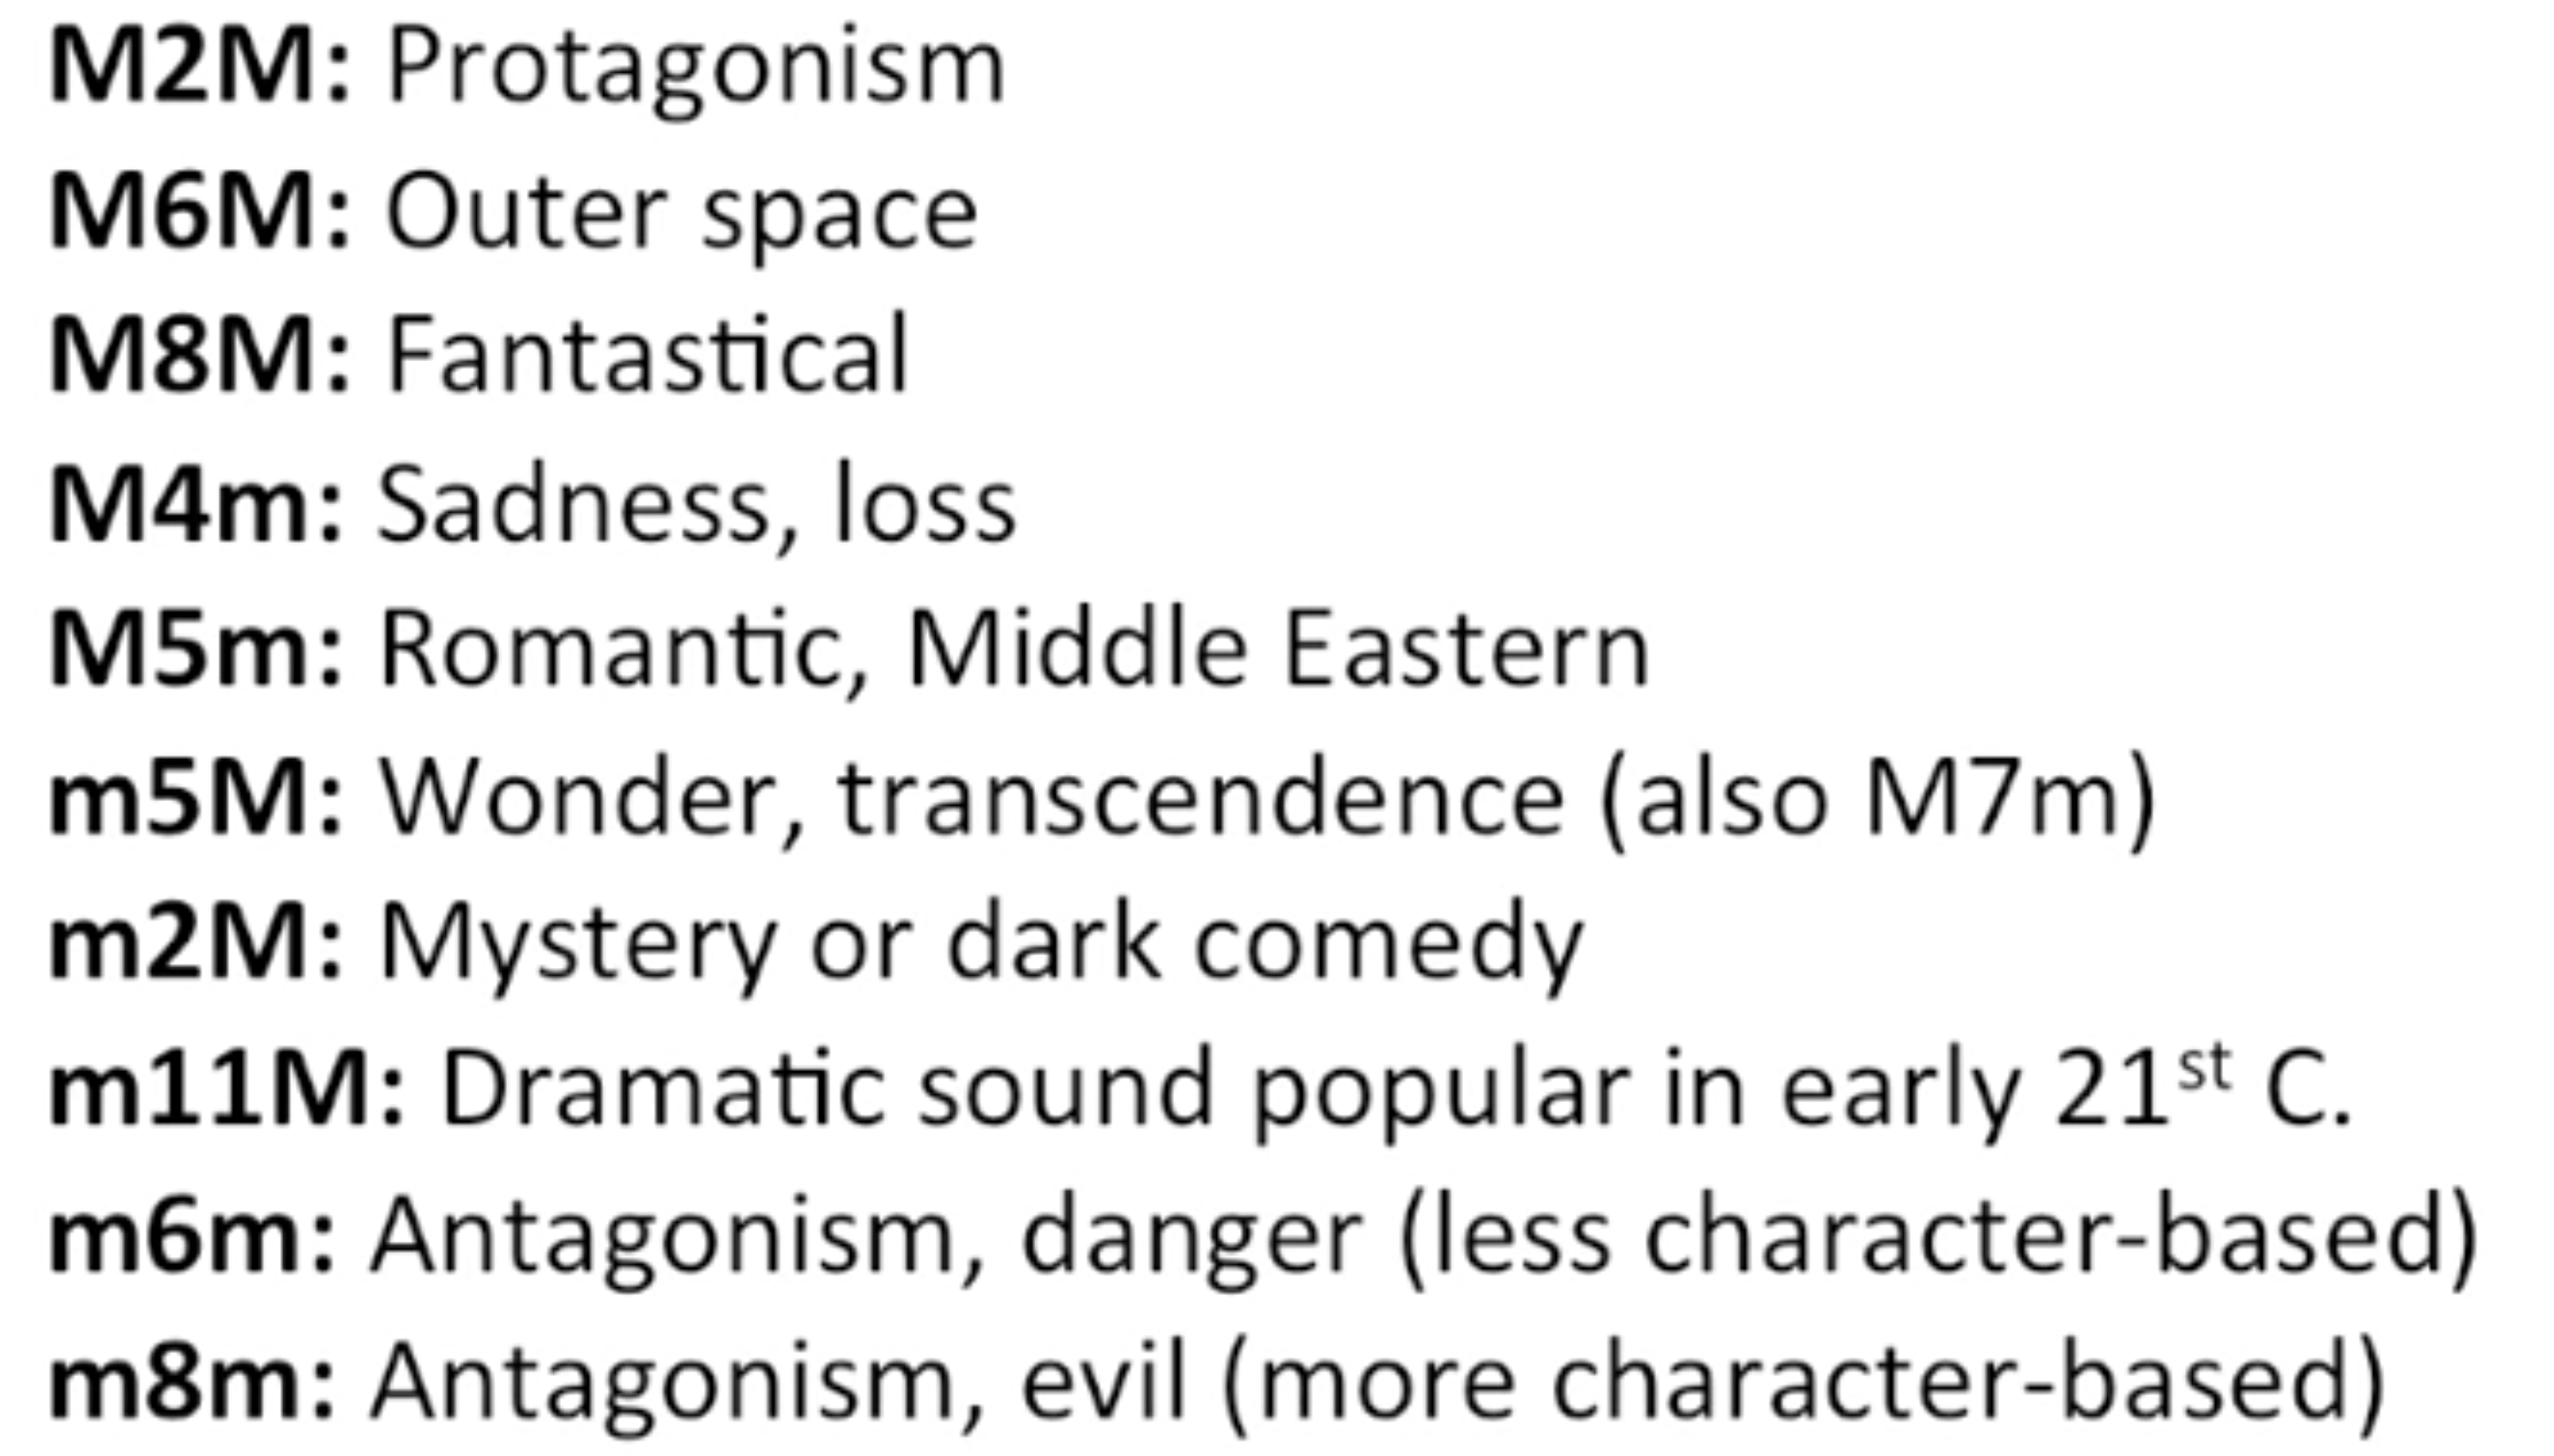

#### Rick Beato
https://www.youtube.com/@RickBeato
* Write like John Williams (https://www.youtube.com/watch?v=xZtvm3DEQzY)
    * 2 major triads, a tritone apart
    * 2 major triads, a tone apart, with a pedal tone – lydian sound
    * Minor triad, down a minor third to a major triad, pedal tone
    * Minor triad, up a major third to a minor triad
* What the pros know (https://www.youtube.com/watch?v=7J8KrZjs6uk)
    * Chords/triads
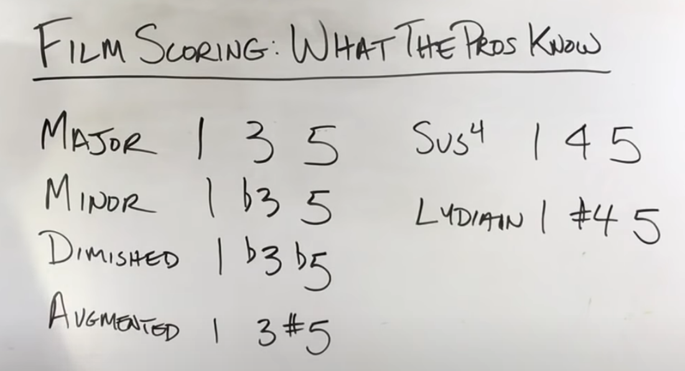
    
        * Cmaj: Bdim, F-lyd, sus4 works on all but Bdim
        * Aug only lives in harmonic/melodic scales: Caug in Am harmonic
    * Scales (major modes) | semitones = colour characteristics
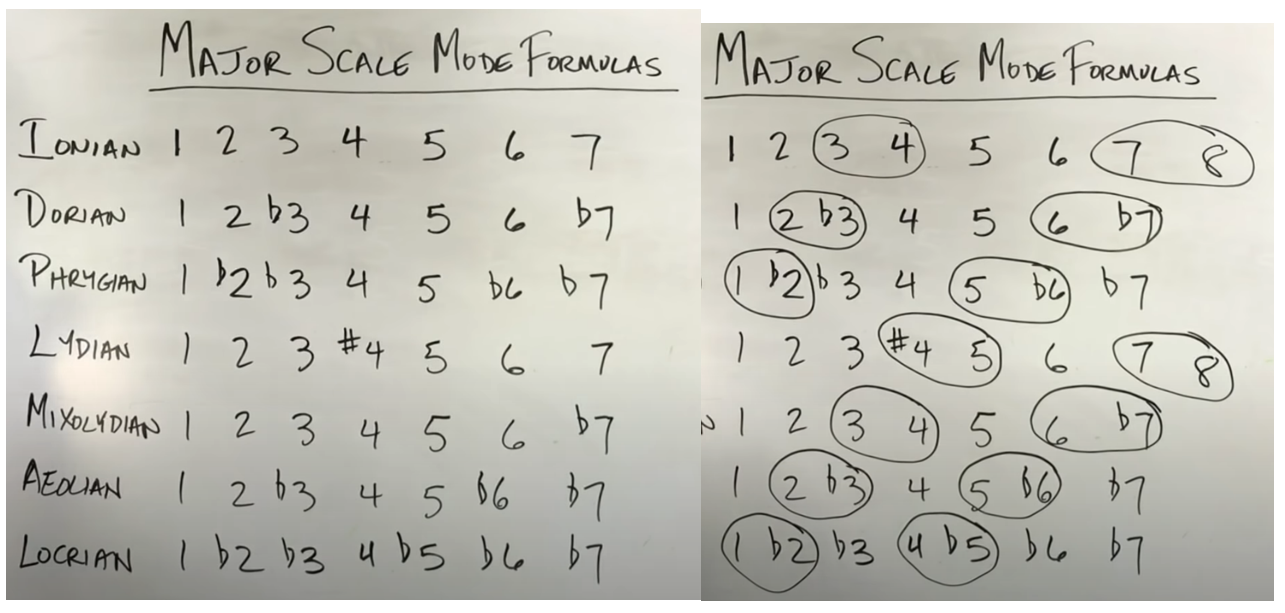

        * Cmaj, colour notes are: E/F and B/C


# Calculations

In [ ]:
# OPTIONAL choose the key (can just use degrees, but could be good to translate)
# OPTIONAL options for alternative scales (hungarian, melodic, neopolitan, etc)
# calculate which chords are available in a key
# separate into standard triads and spicy chords (7th, 9th, Beato stuff from above, etc)
# calculate which chords can be borrowed from other keys by substituting only 1 note
# calculate the probability of starting on any of the chords
# calculate the probability of transitioning to any of the chords
# calculate the probability of ending on the current chord
# OPTIONAL: calculate timing for chords (beyond the scope of the theory notes currenlty above)